In [1]:
#hide
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

# Tutorial: Fine-Tuning

# Tutorial: Fine-Tuning on Cifar10 using an ImageNet pretrained model.

> Fine-tune a Resnet pretrained on ImageNet to Cifar-10

## Load dataset into a dataloader and inspect it

In [2]:
from image_folder_datasets.core import ImageFolderDataModule

data_dir = 'datasets/cifar10'
dm = ImageFolderDataModule(data_dir, 128, transform=None, num_workers=8)
dm.setup()

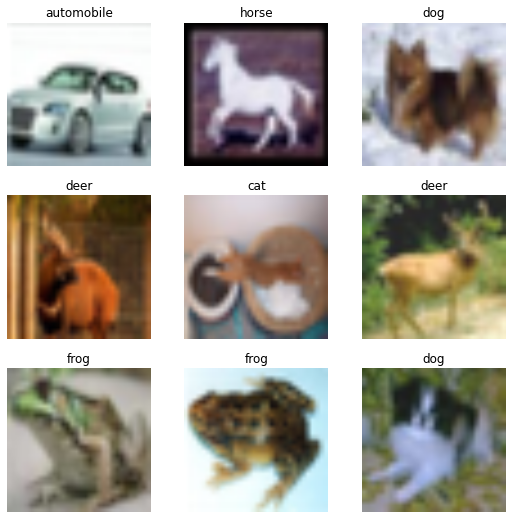

In [3]:
# For ease of use, we also add a dataloader from the fastai library. This can be accessed from `dm.dls`.
# However it is not used for anything else.
dm.dls.show_batch()

## Train a CNN from scratch

You don't have to follow this method, the ImageFolderDataModule is just a pytorch-lightning data module.

In [4]:
import pytorch_lightning as pl
from image_folder_datasets.core import CNNModule
from torchvision import transforms as tfms

transform = tfms.Compose([
    tfms.Resize(256, interpolation=2),
    tfms.RandomCrop(224),
    tfms.ToTensor()])

dm = ImageFolderDataModule(data_dir, 256, transform, num_workers=8)
dm.setup()

modelname = 'resnet18'
model = CNNModule(modelname, pretrained=False, num_classes=len(dm.trainset.classes))

max_epochs = 30
logger = pl.loggers.TensorBoardLogger('tb_logs', name=modelname+'_scratch')
trainer = pl.Trainer(gpus=1, max_epochs=max_epochs, checkpoint_callback=False, logger=logger, num_sanity_val_steps=0)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


## Fine Tune a CNN 

Here we use resnet trained on ImageNet as a pretrained model.
せっかくなので，次の3種類の学習方法を試してみましょう．

- Use pretrain-model as a feature extractor and only learn the last layer (Transfer-Learning).
- Learn all the layers (=Fine-Tuning).
- Learn only the last layers for a few epochs and the learn all the layers (=Fine-Tuning with warm start).

In [5]:
transform = tfms.Compose([
    tfms.Resize(256, interpolation=2),
    tfms.RandomCrop(224),
    tfms.ToTensor(),
    tfms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

dm = ImageFolderDataModule(data_dir, 256, transform, num_workers=8)
dm.setup()

### ImageNet Pretrained Transfer Learning

In [8]:
model_TL = CNNModule(modelname, pretrained=True, freeze_extractor=True, num_classes=len(dm.trainset.classes))
logger = pl.loggers.TensorBoardLogger('tb_logs', name=modelname+'_TL')

trainer = pl.Trainer(gpus=1, max_epochs=max_epochs, checkpoint_callback=False, logger=logger, num_sanity_val_steps=0)
trainer.fit(model_TL, dm)
trainer.test(model_TL, dm.test_dataloader())

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type       | Params
-------------------------------------------------
0 | feature_extractor | Sequential | 11.2 M
1 | classifier        | Linear     | 5.1 K 
-------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

1

### Fine-Tuning 

In [ ]:
model_FT = CNNModule(modelname, pretrained=True, freeze_extractor=False, num_classes=len(dm.trainset.classes))
logger = pl.loggers.TensorBoardLogger('tb_logs', name=modelname+'_FT')

trainer = pl.Trainer(gpus=1, max_epochs=max_epochs, checkpoint_callback=False, logger=logger, num_sanity_val_steps=0)
trainer.fit(model_FT, dm);

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type       | Params
-------------------------------------------------
0 | feature_extractor | Sequential | 11.2 M
1 | classifier        | Linear     | 5.1 K 
-------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

### Fine-Tuning with warm start

In [ ]:
warm_start_epochs = 10

model_FW_WS = CNNModule(modelname, pretrained=True, freeze_extractor=True, num_classes=len(dm.trainset.classes))
logger = pl.loggers.TensorBoardLogger('tb_logs', name=modelname+'_FT_WS')

# Train only last layer
trainer = pl.Trainer(gpus=1, max_epochs=warm_start_epochs, checkpoint_callback=False, logger=logger, num_sanity_val_steps=0)
trainer.fit(model_FW_WS, dm);

# Train all layers
model_FW_WS.freeze_extractor = False
trainer.max_epochs = max_epochs-warm_start_epochs
trainer.fit(model_FW_WS, dm);

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type       | Params
-------------------------------------------------
0 | feature_extractor | Sequential | 11.2 M
1 | classifier        | Linear     | 5.1 K 
-------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]


  | Name              | Type       | Params
-------------------------------------------------
0 | feature_extractor | Sequential | 11.2 M
1 | classifier        | Linear     | 5.1 K 
-------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params


Training: 195it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]